In [1]:
data <- read.csv("Data_T3.csv")

In [2]:
# a first look at the data
head(data)
summary(data)

,X,ID,GROUP,NFL
,<int>,<int>,<chr>,<dbl>
1,1,1,Control,39.195
2,2,2,Control,30.453
3,3,3,Control,46.740
4,4,4,Control,20.433
5,5,5,Control,21.704
6,6,6,Control,40.507


       X               ID           GROUP                NFL        
 Min.   : 1.00   Min.   : 1.00   Length:80          Min.   : 8.295  
 1st Qu.:20.75   1st Qu.:20.75   Class :character   1st Qu.:18.137  
 Median :40.50   Median :40.50   Mode  :character   Median :22.509  
 Mean   :40.50   Mean   :40.50                      Mean   :26.622  
 3rd Qu.:60.25   3rd Qu.:60.25                      3rd Qu.:31.131  
 Max.   :80.00   Max.   :80.00                      Max.   :72.712  

In [3]:
dim(data)

[1] 80  4

In [4]:
library(ggplot2)
library(dplyr)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [5]:
unique(data$GROUP)

[1] "Control" "Low"     "Medium"  "High"

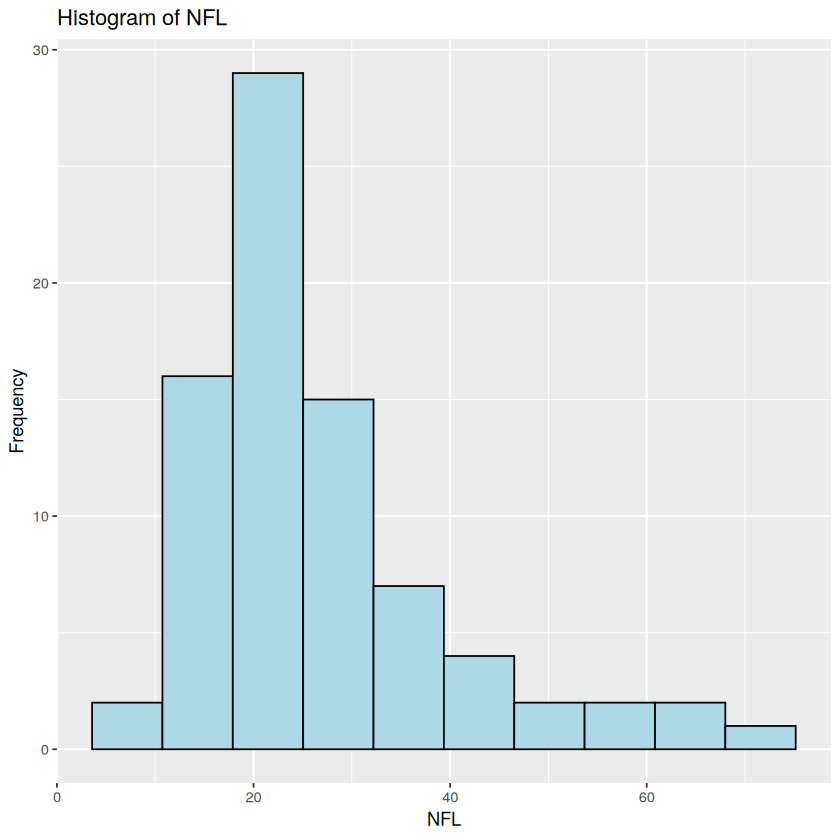

In [6]:
# Create a histogram
ggplot(data, aes(x = NFL)) +
  geom_histogram(bins = 10, color = "black", fill = "lightblue") +
  labs(title = "Histogram of NFL", x = "NFL", y = "Frequency")


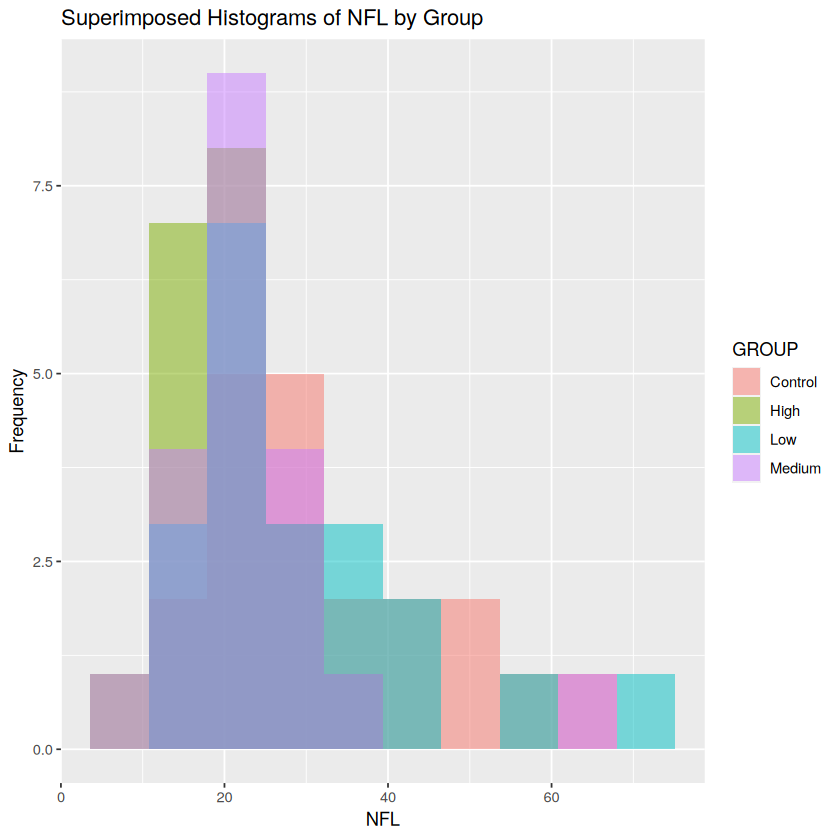

In [7]:
# Create a histogram with group information
ggplot(data, aes(x = NFL, fill = GROUP)) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 10) +
  labs(title = "Superimposed Histograms of NFL by Group", x = "NFL", y = "Frequency")

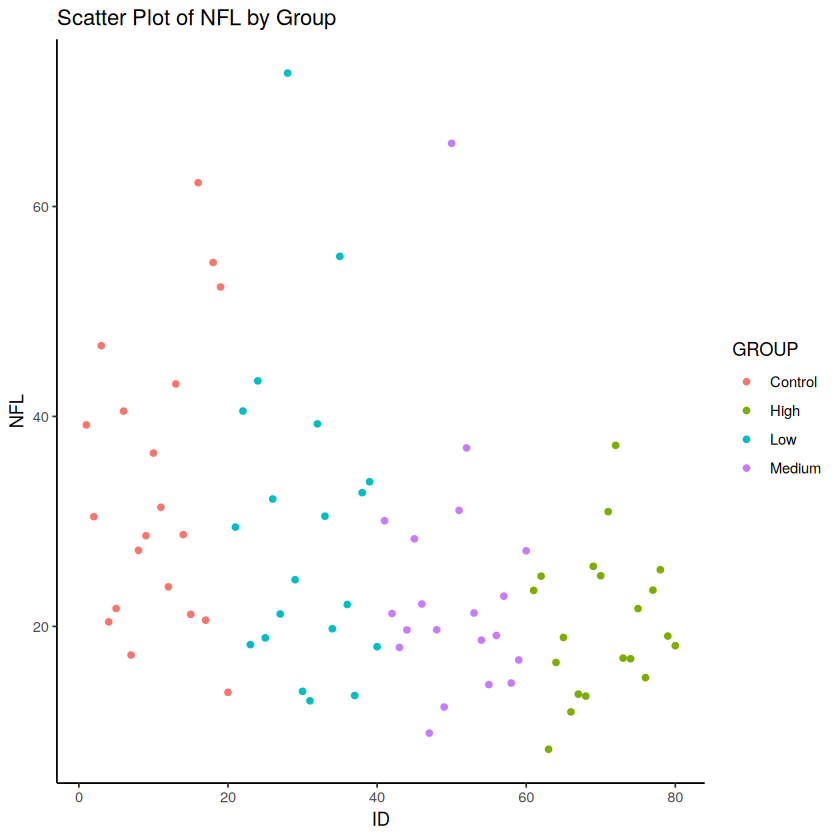

In [8]:
ggplot(data, aes(x = ID, y = NFL, color = GROUP)) +
  geom_point() +
  labs(title = "Scatter Plot of NFL by Group", x = "ID", y = "NFL") +
  theme_classic()


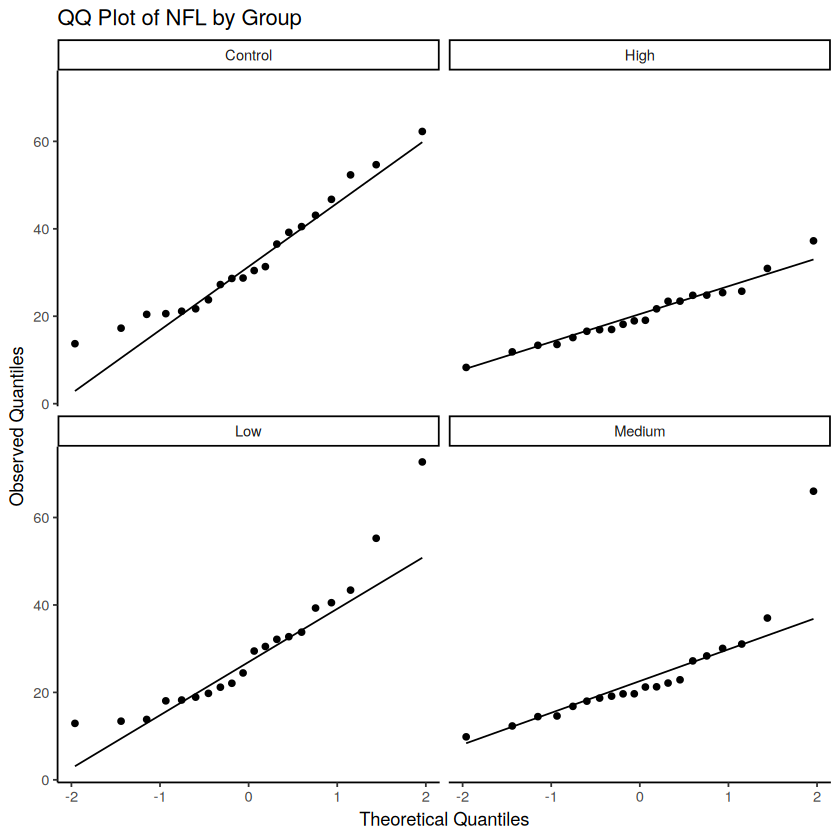

In [10]:
ggplot(data, aes(sample = NFL)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ GROUP) +
  labs(title = "QQ Plot of NFL by Group", x = "Theoretical Quantiles", y = "Observed Quantiles") +
  theme_classic()

Here in the QQ Plot we can observe control & High to follow the normal line quite well. 
*Hence we make our first assumption of control & high dosage group to be following normal distribution*

*Vice versa the low and medium dosage groups show quite a varation from the normal line, we assume them to be not following a normal distribution.*

**We shall verify these assumptions by using Shapiro-Wilk normality test**

In [11]:
# Perform Shapiro-Wilk normality test for NFL concentrations

data %>%
  group_by(GROUP) %>%
  summarise(
    W = shapiro.test(NFL)$statistic,
    p = shapiro.test(NFL)$p.value,
    Result = ifelse(p < 0.05, "fail", "pass")
  )

GROUP,W,p,Result
<chr>,<dbl>,<dbl>,<chr>
Control,0.9449944,0.2974121243,pass
High,0.9675967,0.7035365344,pass
Low,0.8813034,0.0186750310,fail
Medium,0.7638244,0.0002617146,fail


As we can observe that only 2/4 groups are in normal distribution and our assumptions are proved right.
To find correlation we will use **Wilcoxon-Mann-Whitney test** (non-parametric test).

In [12]:
# Wilcoxon-Mann-Whitney test
wilcox.test(data$NFL[data$GROUP == "Low"], data$NFL[data$GROUP == "Control"])
wilcox.test(data$NFL[data$GROUP == "Medium"], data$NFL[data$GROUP == "Control"])
wilcox.test(data$NFL[data$GROUP == "High"], data$NFL[data$GROUP == "Control"])


	Wilcoxon rank sum exact test

data:  data$NFL[data$GROUP == "Low"] and data$NFL[data$GROUP == "Control"]
W = 168, p-value = 0.3983
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  data$NFL[data$GROUP == "Medium"] and data$NFL[data$GROUP == "Control"]
W = 104, p-value = 0.008712
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  data$NFL[data$GROUP == "High"] and data$NFL[data$GROUP == "Control"]
W = 79, p-value = 0.0007474
alternative hypothesis: true location shift is not equal to 0


Using the test we can see effects of the drugs at high and medium concentration.

But in case of the low concentration the effects of the drug is negligible as **Wilcoxon Mann Whitney test** find it similar to the control group.

In [25]:
kruskal.test(NFL ~ GROUP, data)


	Kruskal-Wallis rank sum test

data:  NFL by GROUP
Kruskal-Wallis chi-squared = 12.64, df = 3, p-value = 0.005483


In [26]:
library(conover.test)


conover.test(data$NFL, data$GROUP)

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 12.6402, df = 3, p-value = 0.01


                           Comparison of x by group                            
                                (No adjustment)                                
Col Mean-|
Row Mean |    Control       High        Low
---------+---------------------------------
    High |   3.429637
         |    0.0005*
         |
     Low |   1.099522  -2.330114
         |     0.1375    0.0112*
         |
  Medium |   2.723321  -0.706316   1.623798
         |    0.0040*     0.2411     0.0543

alpha = 0.05
Reject Ho if p <= alpha/2
